In [1]:
import tensorflow as tf
import os
import pathlib

### 1.데이터셋 다운 받기

In [2]:
#data=tf.keras.utils.get_file('cats and dogs.zip',
#                            'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip')
#data

파일 위치 찾아가서 압축해제 해줘야 함~~

In [3]:
path=pathlib.Path('C:/Users/samsung/.keras/datasets/cats and dogs/cats_and_dogs_filtered')

In [4]:
os.listdir(path)

['train', 'validation', 'vectorize.py']

In [5]:
c=list(path.glob('train/cats/*.jpg'))
d=list(path.glob('train/dogs/*.jpg'))
print(len(c), len(d))

1000 1000


- str인 path는 glob할 수 없음
- cats와 dogs는 각각 1000개로 balanced dataset임

### 2.데이터 시각화하기

In [6]:
import numpy as np
import matplotlib.pyplot as plt

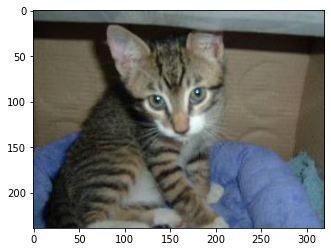

In [73]:
num=np.random.randint(1,1000)
img=tf.keras.preprocessing.image.load_img(c[num])
plt.imshow(img)
plt.show()

### 3.모델 생성하기

In [7]:
train=pathlib.Path('C:/Users/samsung/.keras/datasets/cats and dogs/cats_and_dogs_filtered/train')
validation=pathlib.Path('C:/Users/samsung/.keras/datasets/cats and dogs/cats_and_dogs_filtered/validation')

In [76]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(train, batch_size=64, image_size=(224,224))
validation_data=tf.keras.preprocessing.image_dataset_from_directory(validation, image_size=(224,224))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
vgg=tf.keras.applications.VGG16(include_top=False)

In [10]:
vgg.trainable=True

In [11]:
for i in vgg.layers[:]:
    i.trainable=False

In [72]:
input_=tf.keras.Input((224,224,3))
x=vgg(input_)
x=tf.keras.layers.MaxPooling2D()(x)
x=tf.keras.layers.Dense(64, activation='relu')(x)
x=tf.keras.layers.Dense(1)(x)

In [77]:
model=tf.keras.Model(input_, x)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 512)        0         
 2D)                                                             
                                                                 
 dense_21 (Dense)            (None, 3, 3, 64)          32832     
                                                                 
 dense_22 (Dense)            (None, 3, 3, 1)           65        
                                                                 
Total params: 14,747,585
Trainable params: 32,897
Non-trainable params: 14,714,688
__________________________________________

In [74]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['acc'])

## 8/3수

In [ ]:
tf.keras.application.MobileNetV2(include_top=False)

In [3]:
#!pip install -U tensorflow-hub

In [6]:
import tensorflow_hub as hub
import tensorflow as tf

In [11]:
tf.keras.models.Model is tf.keras.Model
tf.keras.layers.Input is tf.keras.Input

True

In [13]:
layer=hub.KerasLayer('https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5')

hub.keras_layer.KerasLayer

In [14]:
len(layer.weights)

228

## Sequential 모델

In [41]:
input_=tf.keras.Input((224,224,3))
x=tf.keras.layers.Dense(10)(input_)
y=tf.keras.layers.Dense(10)(input_)
z=tf.keras.layers.Concatenate()([x,y])
z=tf.keras.layers.Dense(10)(z)

In [42]:
model0=tf.keras.Model(input_,z)

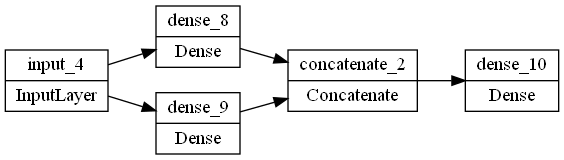

In [43]:
tf.keras.utils.plot_model(model0, rankdir='LR')

이 모델을 다른 모델에 집어넣을 수 있을까?

In [36]:
model0.layers

In [29]:
model1=tf.keras.Sequential(model0.layers)

ValueError: Exception encountered when calling layer "concatenate_1" (type Concatenate).

A merge layer should be called on a list of inputs. Received: inputs=Tensor("Placeholder:0", shape=(None, 224, 224, 10), dtype=float32) (not a list of tensors)

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 224, 224, 10), dtype=float32)

안 됨

In [49]:
model1=tf.keras.Sequential([model0])
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_8 (Functional)        (None, 224, 224, 10)      290       
                                                                 
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


이건 됨 아래에서 이유를 살펴보자면

In [44]:
input_=tf.keras.Input((224,224,3))
xx=tf.keras.layers.Dense(10)(input_)
xx=tf.keras.layers.Dense(10)(xx)

In [45]:
model2=tf.keras.Model(input_,xx)

In [47]:
tf.keras.Sequential(model2.layers).summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 224, 224, 10)      40        
                                                                 
 dense_12 (Dense)            (None, 224, 224, 10)      110       
                                                                 
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


이 방식은 unpacking해서 하나하나의 layer로 바꾸고 다른 모델에 집어넣는 방식임, model0은 multi input, mutli output layer기 때문에 못집어넣었지만 model1은 그렇지 않기 때문에 집어넣을 수 있음

In [46]:
tf.keras.Sequential([model2]).summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_9 (Functional)        (None, 224, 224, 10)      150       
                                                                 
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


model은 layer의 결합이지만 다른 모델 속에서는 하나의 layer로 간주됨

In [50]:
vgg=tf.keras.applications.VGG16()

In [51]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_7')>

In [65]:
vgg.get_config()['input_layers'] #dic의 key로 접근

[['input_7', 0, 0]]

In [66]:
layer=hub.KerasLayer('https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5')

In [67]:
model=tf.keras.Sequential([
    layer,
    tf.keras.layers.Dense(10)
])

In [68]:
model.input

AttributeError: 'Sequential' object has no attribute '_nested_inputs'

In [95]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10)
])

In [97]:
model.input

AttributeError: 'Sequential' object has no attribute '_nested_inputs'

input이 없음, summary()도 못봄, 왜냐 input_shape을 정하지 않았기 때문임, lazy기법으로 만들어짐

In [98]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train=X_train.reshape(-1,28*28)
model(X_train)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[  74.953674 , -213.92535  ,  129.76604  , ...,  245.63387  ,
          54.404343 ,  -39.439922 ],
       [ -83.26362  ,   51.776043 ,  178.64534  , ...,  157.29659  ,
          -1.2427468,  -76.66675  ],
       [ 216.4937   ,   49.486073 ,  102.96957  , ..., -170.33884  ,
          42.10523  , -169.5774   ],
       ...,
       [ -20.703854 , -179.12143  ,  141.51752  , ...,   86.99777  ,
        -100.50438  ,  -77.36091  ],
       [-220.94003  , -126.36528  ,   62.41987  , ...,   26.934057 ,
          12.796424 , -173.12234  ],
       [-145.1689   ,   35.10958  ,   33.196312 , ...,   26.408333 ,
        -113.09334  ,    4.8289685]], dtype=float32)>

In [99]:
model.built

True

In [100]:
model.input

<KerasTensor: shape=(60000, 784) dtype=uint8 (created by layer 'dense_22_input')>

X_train 넣으니까 built도 되었고 input 에러 안 남